
# A Family’s Fate on the Titanic: The Story of Mr. Wilhelm Skoog

#### Description: 
Step aboard the Titanic through the eyes of Mr. Wilhelm Skoog, a 3rd-class passenger traveling with his wife and children.
Using only the Titanic dataset provided by Kaggle, we’ll uncover their chances of survival... analyzing class, fare, deck, and family size before revealing the ultimate question:
Did the Skoog family survive the disaster… or become part of its tragic legacy?

#### Introduction: 
-------------------------
It’s April 10, 1912. Wilhelm Skoog boards the Titanic with his wife and four children…
None of them knew that history would remember this voyage for tragedy, not triumph.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [7]:
#Importing the dataset i'll be using for this story
titanic_data = pd.read_csv("titanic/train.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Column Description¶
1. PassengerId: unique id number to each passenger
2. Survived: passenger survive(1) or died(0)
3. Pclass: passenger class
4. Name: name
5. Sex: gender of passenger
6. Age: age of passenger
7. SibSp: number of siblings/spouses
8. Parch: number of parents/children
9. Ticket: ticket number
10. Fare: amount of money spent on ticket
11. Cabin: cabin category
12. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [9]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#Engineering some new features that'll help us tell this story. 
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['Deck'] = titanic_data.Cabin.astype(str).str[0]
titanic_data['Deck'] = titanic_data['Deck'].replace('n', 'Unknown')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Unknown


In [13]:
#I'll drop the Survived column so at the end of the story, we will find out what happened to the Family.
Survived = titanic_data['Survived']
titanic_data.drop('Survived', axis=1, inplace=True)

In [15]:
Protagonist = titanic_data.iloc[360]
Protagonist

PassengerId                   361
Pclass                          3
Name           Skoog, Mr. Wilhelm
Sex                          male
Age                          40.0
SibSp                           1
Parch                           4
Ticket                     347088
Fare                         27.9
Cabin                         NaN
Embarked                        S
FamilySize                      6
Deck                      Unknown
Name: 360, dtype: object

In [17]:
Protagonist_Fam = titanic_data[titanic_data['Name'].str.contains('Skoog', case=False)]
Protagonist_Fam

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Deck
63,64,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,NaN,S,6,Unknown
167,168,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,NaN,S,6,Unknown
360,361,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,NaN,S,6,Unknown
634,635,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,NaN,S,6,Unknown
642,643,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,NaN,S,6,Unknown
819,820,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,NaN,S,6,Unknown


##### The Skoog family’s cabin number and therefore their deck was never recorded.  
##### In the Titanic’s final hours, this missing detail adds to their mystery.  
##### While history leaves us in the dark, the data may whisper clues.  
##### By studying other passengers with similar class and fare, we can make an educated guess about where the Skoogs’ journey began… and perhaps ended.  

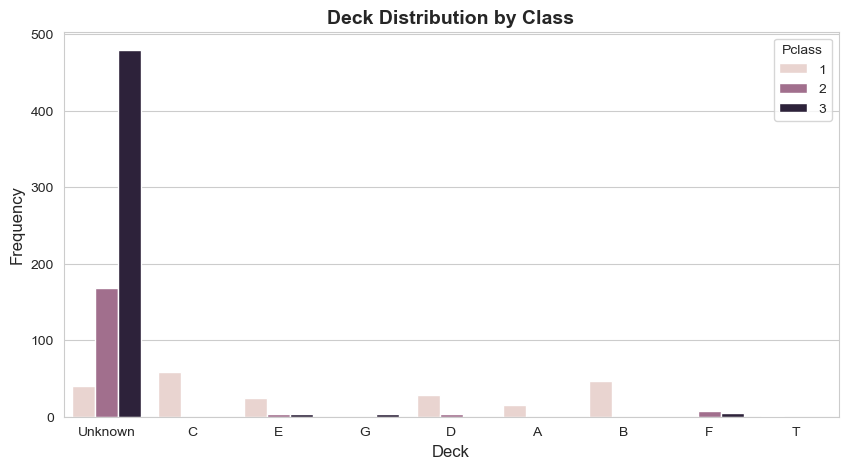

In [19]:
#The relationship between Pclass and Deck
plt.figure(figsize=(10,5))
sns.countplot(
    data = titanic_data, 
    x= 'Deck', 
    hue='Pclass'
)
plt.title('Deck Distribution by Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Deck', fontsize=12)
plt.show()

#### There's a clear pattern between Deck and Pclass:
- Decks A-D were mostly occupied by First class passengers.
- Deck E → mixed, some 2nd class.
- Decks F–G → mostly 3rd class.
- Deck T → barely had any (might be an error)
- Most of passengers with unkown decks were 3rd class so, F, G, possibly E or Orlop/Boat decks

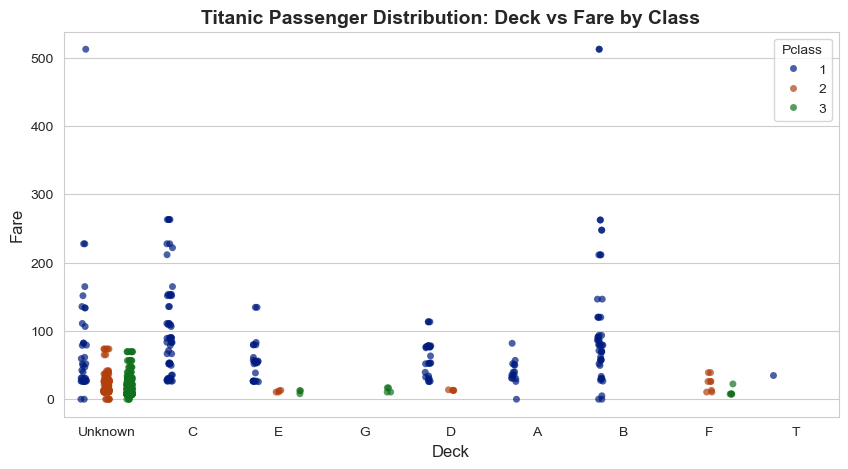

In [21]:
plt.figure(figsize = (10,5))
sns.stripplot(data=titanic_data, 
              x='Deck', 
              y ='Fare', 
              hue='Pclass',
              dodge = True,
              jitter = True,
              alpha = 0.7,
              palette= 'dark'
             )
plt.title("Titanic Passenger Distribution: Deck vs Fare by Class", fontsize=14, fontweight='bold')
plt.ylabel('Fare', fontsize=12)
plt.xlabel('Deck', fontsize=12)
plt.show()

In [23]:
titanic_data['Deck'] = titanic_data['Deck'].replace('Unknown', np.nan)

deck_by_class = titanic_data.groupby(['Pclass', 'Deck']).size().unstack().fillna(0)
deck_by_class_norm = deck_by_class.div(deck_by_class.sum(axis=0), axis=1)
deck_by_class_norm

Deck,A,B,C,D,E,F,G,T
Pclass,,,,,,,,
1,1.0,1.0,1.0,0.878788,0.78125,0.000000,0.0,1.0
2,0.0,0.0,0.0,0.121212,0.12500,0.615385,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.09375,0.384615,1.0,0.0


In [25]:
#Getting the missing Decks from the weighted probability of the passenger's class
def infer_deck(row):
    if pd.isna(row['Deck']):
        probs = deck_by_class_norm.loc[row['Pclass']]
        decks = probs.index
        weights = probs.values / probs.values.sum()
        return np.random.choice(decks, p=weights)
    return row['Deck']

titanic_data['Deck'] = titanic_data.apply(infer_deck, axis=1)

#### Skoog Family Deck Imputation:
After applying our weighted deck inference using deck_by_class_norm, the 6 Skoog family members were assigned to Deck G.

This aligns with the Titanic's historical layout:
+ 3rd class passengers were commonly located in the lower decks (F and G)
+ Large families were often split across nearby cabins due to availability

This inferred placement helps us visualize their survival odds realistically,
since Deck G were closest to the waterline and had the lowest survival rate.

In [27]:
Protagonist_Fam = titanic_data[titanic_data['Name'].str.contains('Skoog', case=False)]
Protagonist_Fam

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Deck
63,64,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,NaN,S,6,G
167,168,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,NaN,S,6,G
360,361,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,NaN,S,6,F
634,635,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,NaN,S,6,F
642,643,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,NaN,S,6,G
819,820,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,NaN,S,6,F


### Stage 2: Visualizing the Skoog Family’s Survival Odds

With the Skoog family identified, it’s time to step into the heart of their story:  
**What were their real chances of survival?**  

On the Titanic, survival wasn’t random. It was shaped by **class, location, and family size**.  
Third-class passengers were trapped deep in the lower decks, families faced the chaos of sticking together,  
and lifeboats filled fast with priority given to wealthier passengers on the higher decks.  

In this stage, we’ll visualize survival odds across key factors   
**Pclass, Sex, Age, Fare, and Family Size**—to see just how stacked the odds were against families like the Skoogs  
before revealing their ultimate fate.  


#### 1: Survival Odds by Class
 --------------------------------
 As the Titanic steamed across the Atlantic, survival was anything but equal.  
 1st-class passengers dined near the lifeboats, while 3rd-class families, like the Skoogs, were buried deep in the ship’s lower decks.  
 This chart reveals the stark survival odds by passenger class and, highlights the peril faced by the Skoog family in third class.  

In [29]:
#Adding back the the survived column 
titanic_data = titanic_data.join(Survived)

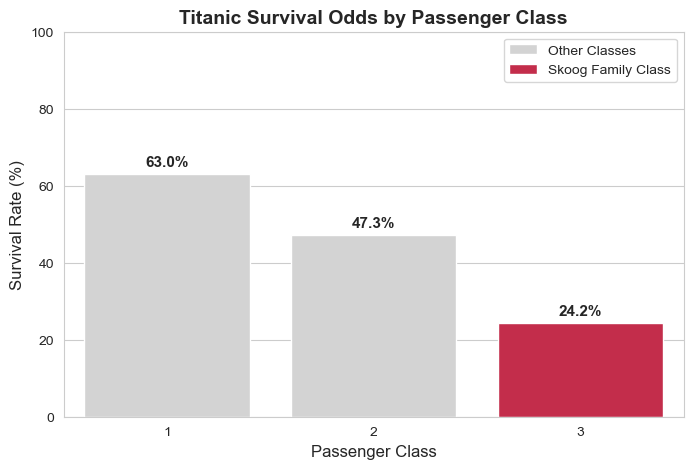

In [31]:
#Pclass
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean().reset_index()
survival_by_class['SurvivalRate'] = survival_by_class['Survived'] * 100

skoog_class = 3
survival_by_class['HighLight'] = survival_by_class['Pclass'].apply(
    lambda x: 'Skoog Family Class' if x == skoog_class else 'Other Classes'
)

plt.figure(figsize=(8, 5))
sns.barplot(data=survival_by_class, 
            x='Pclass', y='SurvivalRate',
            hue= 'HighLight',
            palette={'Skoog Family Class': 'crimson', 'Other Classes': 'lightgray'},
            dodge=False
           )
plt.title('Titanic Survival Odds by Passenger Class', fontsize=14, fontweight='bold')
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylim(0,100)
plt.legend(title='')

for i, row in survival_by_class.iterrows():
    plt.text(
        i, 
        row['SurvivalRate']+2, 
        f"{row['SurvivalRate']:.1f}%",
        ha='center', fontsize=11, fontweight='bold'
    )
plt.show()

#### 2: Survival Odds by Sex
 -----------------------------
 Aboard the Titanic, survival was never just about luck. It was decided by the unspoken rules of tradition and the weight of patriarchy.
 As the icy waters closed in, the unspoken rule of "women and children first" took hold.  
 This chart reveals how gender determined fate:  
 most women were ushered toward the lifeboats, while men were left to face the Atlantic.  
 For the Skoog family, this raises a haunting question:  
 **Did Mrs. Skoog and her children escape… or were they lost to the icy depths?**


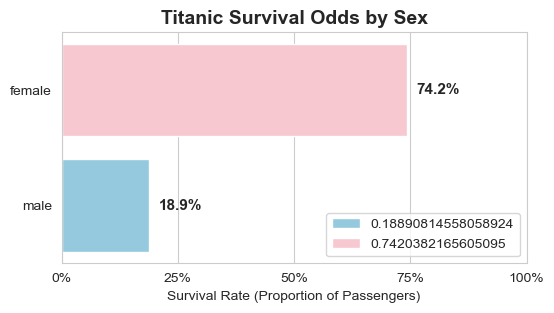

In [33]:
survival_by_sex = titanic_data.groupby('Sex')['Survived'].mean().reset_index()
survival_by_sex['SurvivalRate'] = survival_by_sex['Survived'] * 100


plt.figure(figsize=(6,3))
sns.barplot(
    data=survival_by_sex,
    y='Sex', x='Survived',
    hue='Survived',
    palette=['skyblue', 'pink'],
    orient='h'
)

plt.title('Titanic Survival Odds by Sex', fontsize=14, fontweight='bold')
plt.xlabel('Survival Rate (Proportion of Passengers)')
plt.ylabel('')
plt.xticks([0,0.25,0.5,0.75,1], ['0%','25%','50%','75%','100%'])
plt.legend()

# Annotate percentages on bars
for i, row in survival_by_sex.iterrows():
    plt.text(
        row['Survived'] + 0.02, 
        i, 
        f"{row['SurvivalRate']:.1f}%", 
        va='center', fontsize=11, fontweight='bold'
    )

plt.show()


#### 3: Survival by Age
 -----------------------------
Age played a silent role in deciding who lived and who didn’t on the Titanic.
This chart shows each age group as a stacked bar, where gray represents those who never returned
and green marks the lucky few who found a lifeboat.
Notice how children and young adults had a better fighting chance,
raising the question-**did the Skoog children’s youth help them escape the icy Atlantic?**

In [35]:
age_bins = pd.cut(titanic_data['Age'], bins=range(0, 81, 5))
age_count = titanic_data.groupby(age_bins, observed=False)['Survived'].agg(Total='count', Survivors='sum').reset_index()
age_count['NonSurvivors'] = age_count['Total'] - age_count['Survivors']

age_count['SurvivorsPct'] = (age_count['Survivors'] / age_count['Total']) * 100
age_count['NonSurvivorsPct'] = 100 - age_count['SurvivorsPct']
age_count.head()

,Age,Total,Survivors,NonSurvivors,SurvivorsPct,NonSurvivorsPct
0,"(0, 5]",44,31,13,70.454545,29.545455
1,"(5, 10]",20,7,13,35.000000,65.000000
2,"(10, 15]",19,11,8,57.894737,42.105263
3,"(15, 20]",96,33,63,34.375000,65.625000
4,"(20, 25]",122,42,80,34.426230,65.573770


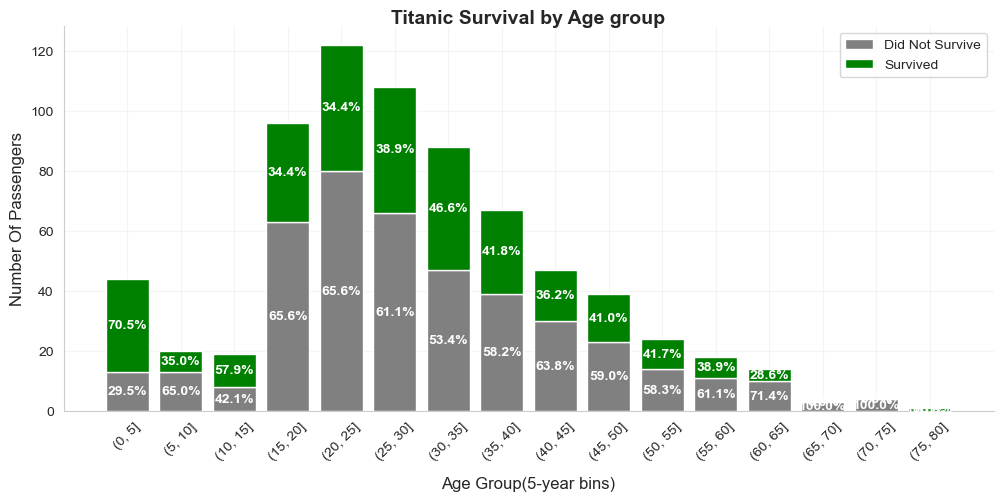

In [37]:
plt.figure(figsize=(12,5))

#NonSurvivors on the bottom
plt.bar(age_count['Age'].astype(str), age_count['NonSurvivors'], color='gray', label='Did Not Survive')

#Survivors on top
plt.bar(age_count['Age'].astype(str), age_count['Survivors'], bottom=age_count['NonSurvivors'], color='green', label='Survived')

plt.title('Titanic Survival by Age group', fontsize=14, fontweight='bold', pad=2.0)
plt.xlabel('Age Group(5-year bins)', fontsize=12, labelpad=10.0)
plt.ylabel('Number Of Passengers', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='')
plt.grid(alpha=0.2)
sns.despine(top=True, right=True)

for i, row in age_count.iterrows():
    # Non-survivor % in bottom section
    plt.text(
        i, row['NonSurvivors']/2, f"{row['NonSurvivorsPct']:.1f}%", 
        ha='center', va='center', color='white', fontsize=10, fontweight='bold'
    )
    # Survivor % in top section
    plt.text(
        i, row['NonSurvivors'] + row['Survivors']/2, f"{row['SurvivorsPct']:.1f}%", 
        ha='center', va='center', color='white', fontsize=10, fontweight='bold'
    )

plt.show()

#### 4: Fare vs Survival
-------------------------------------------------------------------
On the Titanic, your ticket wasn’t just a piece of paper, it was a measure of your odds of survival.
Wealthier passengers who could afford the upper decks often had quicker access to lifeboats,
while families like the Skoogs, traveling on modest fares, were trapped in the lower decks as chaos unfolded.
The chart below reveals a harsh truth: the higher the fare, the better your chance to see another sunrise.

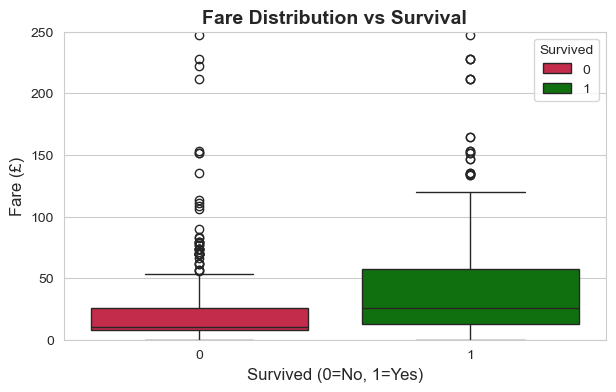

In [39]:
plt.figure(figsize=(7,4))
sns.boxplot(
    data=titanic_data,
    x='Survived', y='Fare', 
    hue='Survived',
    palette={0:'crimson', 1:'green'}
)

plt.title('Fare Distribution vs Survival', fontsize=14, fontweight='bold')
plt.xlabel('Survived (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Fare (£)', fontsize=12)
plt.ylim(0, 250)  # limit to avoid extreme outliers dominating
plt.show()


#### 5: Survival Odds by Family Size
-------------------------------------
Family can be a blessing or a curse on a sinking ship.
This chart shows the survival odds based on family size,
and it paints a chilling picture for families like the Skoogs,
who boarded the Titanic six strong.
As lifeboats filled, small families slipped through the chaos,
while large families faced an unspoken choice: stay together or survive apart.

In [41]:
famsize_survival = titanic_data.groupby('FamilySize')['Survived'].agg(
    SurvivalRate='mean',
    Survivors='sum',
    Total='count'
).reset_index()

famsize_survival['SurvivalRate'] *= 100  # Convert to percentage
famsize_survival

,FamilySize,SurvivalRate,Survivors,Total
0,1,30.353818,163,537
1,2,55.279503,89,161
2,3,57.843137,59,102
3,4,72.413793,21,29
4,5,20.000000,3,15
5,6,13.636364,3,22
6,7,33.333333,4,12
7,8,0.000000,0,6
8,11,0.000000,0,7


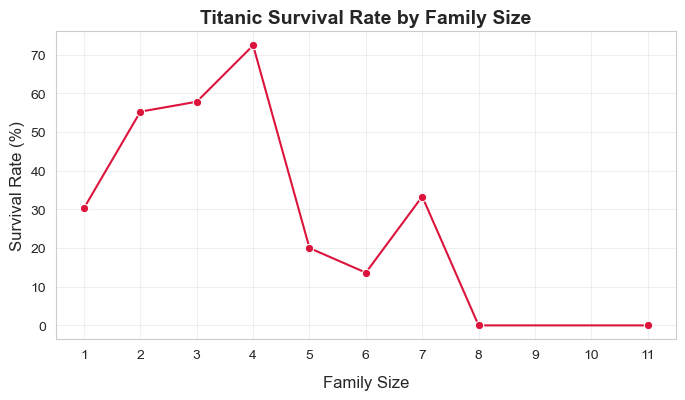

In [43]:
plt.figure(figsize=(8,4))
sns.lineplot(
    data=famsize_survival,
    x='FamilySize', y='SurvivalRate',
    marker='o', color='crimson'
)

plt.title('Titanic Survival Rate by Family Size', fontsize=14, fontweight='bold')
plt.xlabel('Family Size', fontsize=12, labelpad=10.0)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(range(famsize_survival['FamilySize'].min(), famsize_survival['FamilySize'].max()+1))
plt.grid(alpha=0.3)

plt.show()

### Final Summary:
The night of April 14, 1912, was calm and cold, the North Atlantic stretching endlessly under a moonless sky.
The Skoog family slept in their modest Third Class cabin, unaware that at 11:40 PM, steel met ice.
The Titanic shuddered, and a quiet panic began to ripple through the decks.
Above them, lifeboats were filling, priority given to women and children.
But the Skoogs were a family of six, and the lifeboats had no room for loyalty.
In the chaos of the darkened lower decks, every decision was a gamble between love and survival.

When the last distress rocket faded and the great ship’s lights went out, the icy water claimed the Skoog family as one. **None survived.🥹**

In the dataset, they are just six rows.
In history, they are a story of dreams, love, and the cruel mathematics of survival at sea.
As the icy waters claimed the Titanic, the Skoog family’s story ended with the ship.
Their tale is not just a statistic, it’s a reminder that behind every row in a dataset is a life.


In [45]:
Protagonist_Fam = titanic_data[titanic_data['Name'].str.contains('Skoog', case=False)].copy()

#Replace survival with emoji
Protagonist_Fam['Survived'] = Protagonist_Fam['Survived'].apply(lambda x: '✅' if x == 1 else '❌') 
#Drop irrelevant columns from family table
Protagonist_Fam = Protagonist_Fam.drop(['SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1)
Protagonist_Fam.reset_index(drop=True, inplace=True)
Protagonist_Fam

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Deck,Survived
0,64,3,"Skoog, Master. Harald",male,4.0,27.9,S,6,G,❌
1,168,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,27.9,S,6,G,❌
2,361,3,"Skoog, Mr. Wilhelm",male,40.0,27.9,S,6,F,❌
3,635,3,"Skoog, Miss. Mabel",female,9.0,27.9,S,6,F,❌
4,643,3,"Skoog, Miss. Margit Elizabeth",female,2.0,27.9,S,6,G,❌
5,820,3,"Skoog, Master. Karl Thorsten",male,10.0,27.9,S,6,F,❌


In [55]:
import matplotlib

for i in plt.get_fignums():
    fig = plt.figure(i)
    fig.savefig(f"chart_{i}.jpeg", format="jpeg", dpi=300 )



<module 'posixpath' (frozen)>

In [53]:
import os
os.getcwd()

'/Users/capt.lilo'